<a href="https://colab.research.google.com/github/NikolaiTeslovich/sSNOM/blob/master/Copy_of_sSNOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import necessary Python packages
import os
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
!pip install lmfit

# print message after packages imported successfully
print("import of packages successful")


import of packages successful


In [0]:
#check working directory directory
print(os.getcwd())

/content


In [0]:
# load the text file
A = np.loadtxt(fname = "/content/M0A.txt")
# load a second text file
B = np.loadtxt(fname = "/content/R-M0A.txt")
print("files successfully imported")
# print that the files were successfully imported

files successfully imported


In [0]:
# minimize the dimensions of each array
np.squeeze(A)
np.squeeze(B)

array([[156.99557495, 157.07228088, 157.19381714, ..., 156.984375  ,
        156.98199463, 156.9828949 ],
       [157.01086426, 157.20944214, 157.22166443, ..., 157.17692566,
        157.20178223, 157.19836426],
       [157.2121582 , 157.24275208, 157.24023438, ..., 157.2170105 ,
        157.22120667, 157.22401428],
       ...,
       [158.49917603, 158.30410767, 158.29196167, ..., 158.47434998,
        158.47570801, 158.47480774],
       [158.30532837, 158.51693726, 158.51589966, ..., 158.28903198,
        158.29141235, 158.34545898],
       [158.34240723, 158.54006958, 158.5422821 , ..., 158.51820374,
        158.51208496, 158.50994873]])

In [0]:
# reverse each line of the array R-MOA
B_flip = np.fliplr(B)

In [0]:
#find the dimensions of the array
num_column = A.shape[1]
num_row = A.shape[0]

In [0]:
# layer rows of the forward and reverse(flipped) files in alternating order
C = np.zeros((num_row*2, num_column))
C[0::2] = A
C[1::2] = B_flip
C = np.array(C)

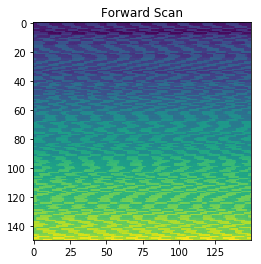

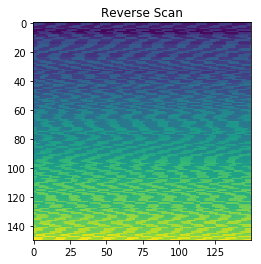

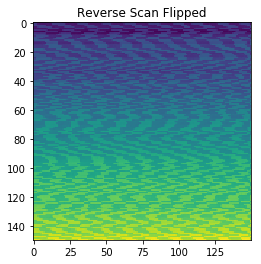

In [0]:
plt.imshow(A, interpolation='none')
plt.title('Forward Scan')

plt.show()

plt.imshow(B, interpolation='none')
plt.title('Reverse Scan')

plt.show()

plt.imshow(B_flip, interpolation='none')
plt.title('Reverse Scan Flipped')

plt.show()

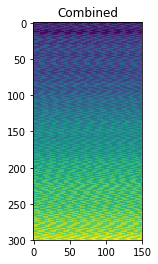

In [0]:
# diplay the result visually
plt.imshow(C, interpolation='none')
plt.title('Combined')
plt.show()

In [0]:
# flatten the resultant array
C_flat = C.flatten()

In [0]:
# normalize all the values in relation to the smallest
C_min = np.amin(C)
C_flat_min = C_flat - C_min

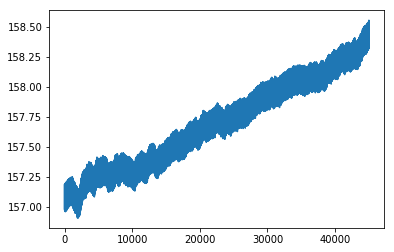

In [0]:
# graph the difference in signal in relation to each pixel
plt.plot(C_flat)
plt.show()

In [0]:
# run an FFT on the combined data
C_FFT = np.fft.rfft(C_flat_min)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


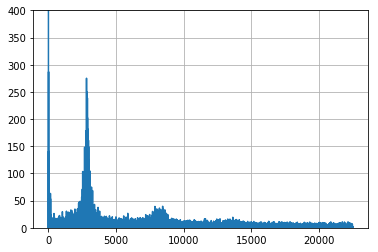

In [0]:
# graphing the real part of the data
plt.plot(C_FFT)
plt.ylim(0, 400)
plt.grid()
plt.show()

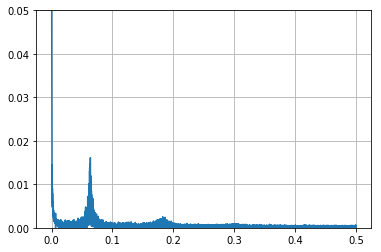

In [0]:
# another graph on the FFT, not quite sure how to do this yet

# sample rate, for the corresponding amount of pixels
N = 45000 

plt.ylim(0, 0.05)
T = 1
x = np.linspace(0.0, N*T, N)
yf = C_FFT
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [0]:
#find the linear line of best fit
from statistics import mean

xs = np.array(np.arange(C_flat.size))
ys = np.array(C_flat)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)


2.872551704793178e-05 157.0443329098775


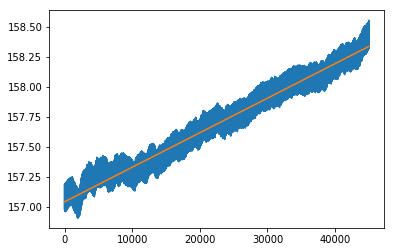

In [0]:
# graph data in the combined array with the corresponding trend line
plt.plot(C_flat)
plt.plot(x, m*x + b)
plt.show()

In [0]:
num_0_to_45000 = np.array(np.arange(0, 45000, 1))
num_0_to_45000.size

45000

In [0]:
slope_for_each_int = num_0_to_45000 * m


In [0]:
C_noslope = C_flat - slope_for_each_int

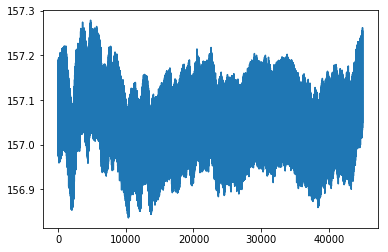

In [0]:
plt.plot(C_noslope)
plt.show()


In [0]:
# run an FFT on the combined data
C_FFT_noslope = np.fft.rfft(C_noslope)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


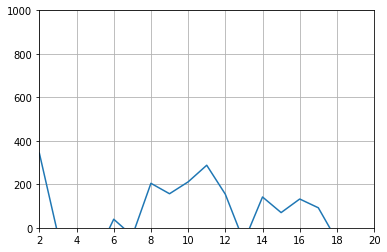

In [0]:
# graphing the real part of the data
plt.plot(C_FFT_noslope)
plt.ylim(0, 1000)
plt.xlim(2, 20)
plt.grid()
plt.show()

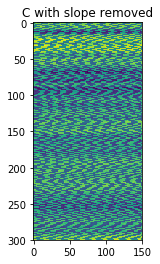

In [0]:
plt.imshow(np.reshape(C_noslope, (300, 150)), interpolation='none')
plt.title('C with slope removed')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


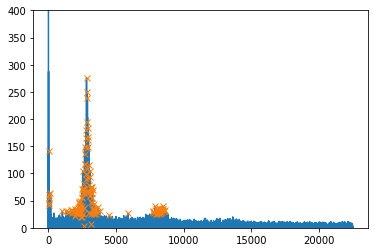

In [128]:
peaks, _ = find_peaks(C_FFT_noslope, prominence = 50, distance = 10)
plt.plot(C_FFT_noslope)
plt.ylim(0, 400)
plt.plot(peaks, C_FFT_noslope[peaks], "x")
plt.show()

In [0]:
C_FFT_noslope_list = C_FFT_noslope.tolist()

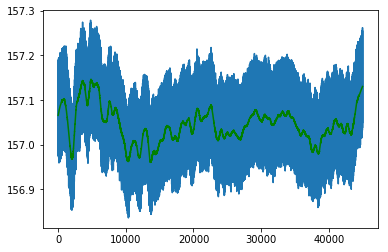

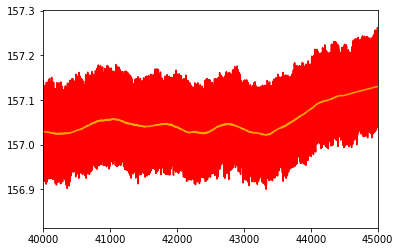

In [0]:
window = 1001 #savgol filter window size
order = 2 #savgol filter polynomial order

plt.plot(C_noslope)
plt.plot(savgol_filter(C_noslope, window, order), color = 'green')
plt.show()

plt.plot(C_noslope, color = 'red')
plt.plot(savgol_filter(C_noslope, window , order), color = 'orange')
plt.xlim(40000, 45000)
plt.show()

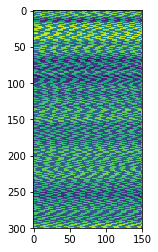

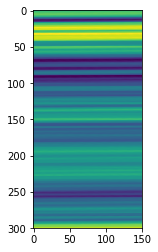

In [146]:
plt.imshow(np.reshape(C_noslope, (300, 150)), interpolation='none')
plt.show()

plt.imshow(np.reshape(savgol_filter(C_noslope, window, order), (300, 150)), interpolation='none')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


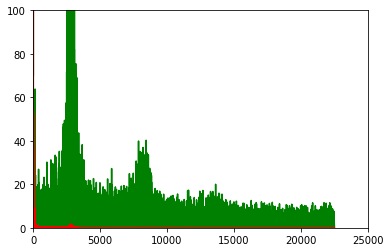

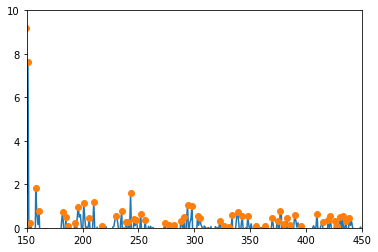

In [155]:
plt.plot(C_FFT_noslope, color = 'green')
plt.plot(np.fft.rfft(savgol_filter(C_noslope, window, order)), color = 'red')
plt.xlim(0, 25000)
plt.ylim(0, 100)
plt.show()

C_filtered_FFT = np.fft.rfft(savgol_filter(C_noslope, window, order))
peaks, _ = find_peaks(C_filtered_FFT, prominence = 0.25, distance = 1, height = (None, 10))
plt.plot(C_filtered_FFT)
plt.plot(peaks, C_filtered_FFT[peaks], "o")
plt.ylim(0, 10)
plt.xlim(150, 450)
plt.show()

Try and perhaps level the data out individually on each array